# Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Avaliação dos algoritmos

Abaixom, segue uma lista especificando cada algoritmo de classificação para as mesmas basse de dados que fui usando para estudar e colocando cada um em um repositório distinto.
[Link para o repositório](https://github.com/GaybsGimenez?tab=repositories)

## Resultado de cada modelo testado utilizando o método tradicional de divisão em grupo de treinamento e teste.

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60





## Tuning dos parâmetros com GridSearch
O Tuning dos parâmetros no método de validação cruzada dos dados refere-se ao processo de ajustar e otimizar os parâmetros de um modelo de aprendizado de máquina para melhorar seu desempenho. A validação cruzada é uma técnica que envolve dividir os dados em múltiplas partes, treinando e testando o modelo várias vezes com diferentes subdivisões dos dados. O tuning dos parâmetros busca encontrar a combinação ideal de valores de parâmetros que maximize a precisão do modelo ao ser avaliado em várias partições dos dados, garantindo que o modelo seja robusto e generalize bem para dados novos e não vistos..

### Preparação dos dados

In [ ]:
from sklearn.model_selection import GridSearchCV # pesquisa em grade que escolhe o melhor conjunto de parametros, validação cruzada
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

1. Os dados estavam divididos em Treinamento e Teste.
2. Para o trabalho utilizando o método de validação cruzada precisamos concatêna-los novamente
3. Testar o método de validação cruzada com os algoritmos utilizados para estudo e suas respectivas acurácias:

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60


### Concatenar essas duas bases, de treinamento e teste para ter a base completa novamente

Como esses dados ja estavam dividos em treinamento e teste, precisaremos concatená-los para termos a base completa novamente

Não é necessário realizar a divisão dos dados em conjuntos de treinamento e teste, pois o algoritmo GridSearchCV executa a validação cruzada, automaticamente dividindo os dados em K partes para avaliação.


In [ ]:
# Treinamento 1500 registros e 3 colunas (atributos previsores)
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
# Teste
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
# concatenação das bases de treinamento e teste
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0) # axis = 0, ele concatena as linhas / axis = 1 concatena as colunas
X_credit.shape

(2000, 3)

In [ ]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
# concatenar as respostas esperadas

y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [ ]:
# 0 quando o cliente paga o emprestimo
# 1 quando o clinete não paga o emprestimo
y_credit

array([0, 0, 0, ..., 0, 1, 1])

### Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'], # testar todos os parâmetros
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10], # escolha dos valores de forma aleatória
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros) # param_grid=parametros, assim recebe o dicionariod e parametros e compara todos com todos, setando um por um
grid_search.fit(X_credit, y_credit) # passamos as respostas esperadas e previsores e  #fit. treinamento e ajuste dos parametro
melhores_parametros = grid_search.best_params_ # criação da varição melhores_parametros
melhor_resultado = grid_search.best_score_ # melhor accuracy
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


#### Comparação Arvore de Decisão

Com algoritmo de validação cruzada a acurácia teve melhora de 0.10

* Árvore de decisão (divisão e teste): 98.20
* Árvore de decisão (validação cruzada): 98.30

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões
```
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
```

### Random forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150], # numero de árvores
              'min_samples_split': [2, 5, 10], # escolha dos valores de forma aleatória
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9855


#### Comparação RamdonForest

Com algoritmo de validação cruzada a acurácia teve melhora de 0.44

* RamdonForest (divisão e teste): 98.40%
* RamdonForest (validação cruzada): 98.84%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões
```
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
```

### Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20], # numero de vizinho mais próximos
              'p': [1, 2]} # 2 = Distancia euclidiana e 1 = Distancia manhattan

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


#### Comparação NKK

Com algoritmo de validação cruzada a acurácia teve redução de 0.60

* knn (divisão e teste): 98.60%
* knn (validação cruzada): 98.00%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'n_neighbors': 20, 'p': 1}
```

### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001], # valores de tolerância
              'C': [1.0, 1.5, 2.0], # quanto maior o valor mais o algoritmo tentará se ancaixar nos dados
              'solver': ['lbfgs', 'sag', 'saga']} # algoritmo utilizado para fazer o ajuste dos valores (encontrar os coeficientes) os outros parametros são: newton-cg liblinear

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


#### Comparação Regressão logistica

Com algoritmo de validação cruzada a acurácia teve melhora de 0.15

* Regressão logistica (divisão e teste): 94.60%
* Regressão logistica (validação cruzada): 94.85%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}

```


### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001], # valores de tolerancia
              'C': [1.0, 1.5, 2.0], # quanto maior o valor, mais a tendencia do algoritmo de adaptar
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} #algoritmo utilizado para fazer o ajuste dos valores (encontrar os coeficientes) os outros parametros são: newton-cg liblinear

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


#### Comparação SVM

Com algoritmo de validação cruzada a acurácia teve redução de 0.50

* SVM (divisão e teste): 98.80%
* SVM (validação cruzada): 98.30%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}

```


### Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'], # funções de ativação (existem outros valores, mas vamos usar somente esses para não demorar muito)
              'solver': ['adam', 'sgd'], # algoritmo utilizado para fazer o ajuste dos valores (encontrar os coeficientes) os outros parametros são: newton-cg liblinear
              'batch_size': [10, 56]} # valor que indica de quantas em quantas vezes será feita a atualização dos pesos

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


#### Comparação Rede Neural

Com algoritmo de validação cruzada a acurácia teve redução de 0.50

* Rede Neural (divisão e teste): 99.60%
* Rede Neural (validação cruzada): 99.65%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}

```

In [ ]:
!pip -q install plotly

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Comparação RamdonForest

Com algoritmo de validação cruzada a acurácia teve melhora de 0.44

* RamdonForest (divisão e teste): 98.40%
* RamdonForest (validação cruzada): 98.84%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões
```
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
```

### Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20], # numero de vizinho mais próximos
              'p': [1, 2]} # 2 = Distancia euclidiana e 1 = Distancia manhattan

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


#### Comparação NKK

Com algoritmo de validação cruzada a acurácia teve redução de 0.60

* knn (divisão e teste): 98.60%
* knn (validação cruzada): 98.00%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'n_neighbors': 20, 'p': 1}
```

### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001], # valores de tolerância
              'C': [1.0, 1.5, 2.0], # quanto maior o valor mais o algoritmo tentará se ancaixar nos dados
              'solver': ['lbfgs', 'sag', 'saga']} # algoritmo utilizado para fazer o ajuste dos valores (encontrar os coeficientes) os outros parametros são: newton-cg liblinear

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


#### Comparação Regressão logistica

Com algoritmo de validação cruzada a acurácia teve melhora de 0.15

* Regressão logistica (divisão e teste): 94.60%
* Regressão logistica (validação cruzada): 94.85%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}

```


### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001], # valores de tolerancia
              'C': [1.0, 1.5, 2.0], # quanto maior o valor, mais a tendencia do algoritmo de adaptar
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} #algoritmo utilizado para fazer o ajuste dos valores (encontrar os coeficientes) os outros parametros são: newton-cg liblinear

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


#### Comparação SVM

Com algoritmo de validação cruzada a acurácia teve redução de 0.50

* SVM (divisão e teste): 98.80%
* SVM (validação cruzada): 98.30%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}

```


### Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'], # funções de ativação (existem outros valores, mas vamos usar somente esses para não demorar muito)
              'solver': ['adam', 'sgd'], # algoritmo utilizado para fazer o ajuste dos valores (encontrar os coeficientes) os outros parametros são: newton-cg liblinear
              'batch_size': [10, 56]} # valor que indica de quantas em quantas vezes será feita a atualização dos pesos

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9975000000000002


#### Comparação Rede Neural

Com algoritmo de validação cruzada a acurácia teve redução de 0.50

* Rede Neural (divisão e teste): 99.60%
* Rede Neural (validação cruzada): 99.65%

Por meio do Tuning, os valores dos parametros reavaliados foram alterados para obtenção de melhores resultados:

Antes, utilizamos valores padrões agora, temos:

```
{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}

```

## Validação cruzada

> Validação cruzada é uma técnica usada para avaliar o desempenho de um modelo de aprendizado de máquina, dividindo os dados em conjuntos de treinamento e teste múltiplas vezes.



In [ ]:
# cross_val_score: Essa função é usada para avaliar um modelo usando validação cruzada.
# KFold: Essa classe é usada para realizar a validação cruzada K-fold.
# K-fold divide os dados em K subconjuntos (ou "folds"). Em cada rodada da validação cruzada, um subconjunto diferente é usado como conjunto de teste e os K-1 subconjuntos restantes são usados como conjunto de treinamento.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV # pesquisa em grade que escolhe o melhor conjunto de parametros, validação cruzada
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# X_credit = concatenação das bases de treinamento e teste. y_credit = concatenar as respostas esperadas
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0) # axis = 0, ele concatena as linhas / axis = 1 concatena as colunas
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [ ]:
quantidade_de_teste = 10 * 30
print("quantidade de teste para cada algoritmo:", quantidade_de_teste)


quantidade de teste para cada algoritmo: 300


In [ ]:
resultados_arvore =[]
for i in range(30):
  # print(i) [0:29]
  #kfold divide a base de dados que será usada pelo cross_val_score para fazer os testes
  Kfold = KFold(n_splits=10, shuffle=True, random_state=i) # (n_splits=10 (1 para teste e 9 para treinamento) (huffle=True, para o algoritmo misturar os dados) (random_state=i, a cada vez que será execuado, teremos resultados diferentes, se o valor por 1, os resultados serão sempre os mesmos)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best') # fazemos  o tuning depois criamos o algoritmo com os melhores parâmetros obtidos
  scores = cross_val_score(arvore, X_credit, y_credit, cv = Kfold) #função cross_val_score para fazer a validação cruzada
  #print("Vetores:", scores)
  #print("Média dos resultados: ", scores.mean())
  resultados_arvore.append(scores.mean())

In [ ]:
# utilização desses resultados para fazer a comparação entre os algoritmo
resultados_arvore

[0.9864999999999998,
 0.986,
 0.9905000000000002,
 0.9875,
 0.9890000000000001,
 0.9884999999999999,
 0.9884999999999999,
 0.9875,
 0.9860000000000001,
 0.9869999999999999,
 0.9860000000000001,
 0.9899999999999999,
 0.9889999999999999,
 0.9864999999999998,
 0.9855,
 0.9859999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.982,
 0.9870000000000001,
 0.9889999999999999,
 0.9869999999999999,
 0.9870000000000001,
 0.9884999999999999,
 0.9875,
 0.986,
 0.986,
 0.9884999999999999]

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

7


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

8


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

9


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

11


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

12


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

13


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

14


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

15


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

16


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

17


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

18


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

19


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

22


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

23


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

24


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

25


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

26


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

27


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

28


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

29


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
# armazenar os resultados em um dataframe com base no accuracy
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9870,0.9850,0.9815,0.9475,0.9845,0.9975
1,0.9850,0.9825,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9835,0.9795,0.9470,0.9865,0.9975
3,0.9875,0.9810,0.9780,0.9460,0.9850,0.9965
4,0.9890,0.9835,0.9820,0.9465,0.9850,0.9970
5,0.9885,0.9825,0.9780,0.9465,0.9845,0.9975
6,0.9880,0.9850,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9850,0.9800,0.9480,0.9850,0.9970
8,0.9860,0.9830,0.9795,0.9465,0.9840,0.9970
9,0.9875,0.9825,0.9820,0.9465,0.9845,0.9975


In [ ]:
# estastisticas de descrição de cada modelo
resultados.describe()

#std é o desvio padrão (obs: muito utilizado para verificar o risco de ações na bolsa de valores)
# std: quanto maior o desvio padrão mais a variação - serve para vizualizar a melhor consistencia do algoritmo
# quanto menor o desvio padrão, mais CONSISTENTE é o algoritmo de classificação
# ideal é MAIOR accuray e MENOR desvio padrão

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.983567,0.980050,0.946950,0.985083,0.997117
std,0.001695,0.001318,0.001533,0.000687,0.001280,0.000552
min,0.983000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986125,0.982625,0.979000,0.946500,0.984125,0.997000
50%,0.987250,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.984875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.986000,0.982500,0.948500,0.987500,0.998000


In [ ]:
# vizualizar a variança (o desvio padrão é calculado por meio da variancia - não é muito recomendado, melhor fazer analise por std (desvio padrão))
resultados.var()

Arvore           2.874713e-06
Random forest    1.736782e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      3.048851e-07
dtype: float64

In [1]:
# vizualização do coeficiente de variação (vizualizado em formato de probabilidade)
 (resultados.std() / resultados.mean()) * 100

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [ ]:
alpha = 0.05

In [ ]:
 # biblioteca estatistica do python
from scipy.stats import shapiro

Teste de normalidade Shapiro-Wilk para verificar se as amostras `resultados_arvore`, `resultados_random_forest`, `resultados_knn`, `resultados_logistica`, `resultados_svm` e `resultados_rede_neural` seguem uma distribuição normal. O teste de Shapiro-Wilk avalia a hipótese nula de que os dados vêm de uma distribuição normal.

Para interpretar os resultados, você olha para o valor de p (pvalue) retornado pelo teste:

- Se o valor de p for maior que o nível de significância (alpha), que neste caso é 0.05, você não rejeita a hipótese nula e pode considerar que os dados seguem uma distribuição normal.
- Se o valor de p for menor ou igual a 0.05, você rejeita a hipótese nula e conclui que os dados não seguem uma distribuição normal.

Vamos interpretar os resultados obtidos:

1. `resultados_arvore`: pvalue = 0.23968401551246643
   - Não rejeitamos a hipótese nula (p > 0.05), então os dados podem seguir uma distribuição normal.

2. `resultados_random_forest`: pvalue = 0.14693836867809296
   - Não rejeitamos a hipótese nula (p > 0.05), então os dados podem seguir uma distribuição normal.

3. `resultados_knn`: pvalue = 0.28181397914886475
   - Não rejeitamos a hipótese nula (p > 0.05), então os dados podem seguir uma distribuição normal.

4. `resultados_logistica`: pvalue = 0.07598038017749786
   - Rejeitamos a hipótese nula (p <= 0.05), então os dados não seguem uma distribuição normal.

5. `resultados_svm`: pvalue = 0.354146808385849
   - Não rejeitamos a hipótese nula (p > 0.05), então os dados podem seguir uma distribuição normal.

6. `resultados_rede_neural`: pvalue = 0.04878862202167511
   - Rejeitamos a hipótese nula (p <= 0.05), então os dados não seguem uma distribuição normal.

Portanto, baseado nos resultados do teste de Shapiro-Wilk, podemos dizer que:  - `resultados_arvore`, `resultados_random_forest`, `resultados_knn` e `resultados_svm` provavelmente seguem uma distribuição normal.

-
 `resultados_logistica` e `resultados_rede_neural` não seguem uma distribuição normal, a menos que outras condições ou verificações sejam feitas.


In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9557062983512878, pvalue=0.23968401551246643),
 ShapiroResult(statistic=0.9477308988571167, pvalue=0.14693836867809296),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.9298949837684631, pvalue=0.04878862202167511))

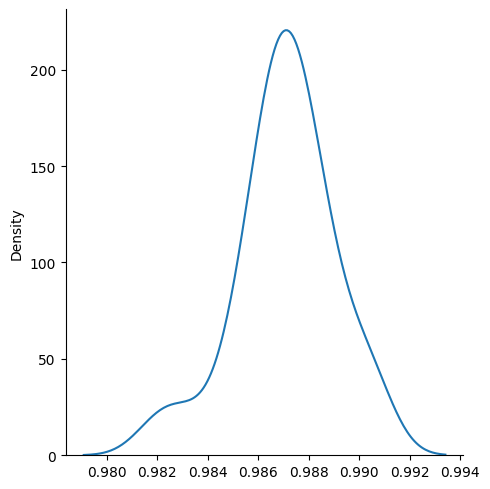

In [ ]:
sns.displot(resultados_arvore, kind = 'kde');

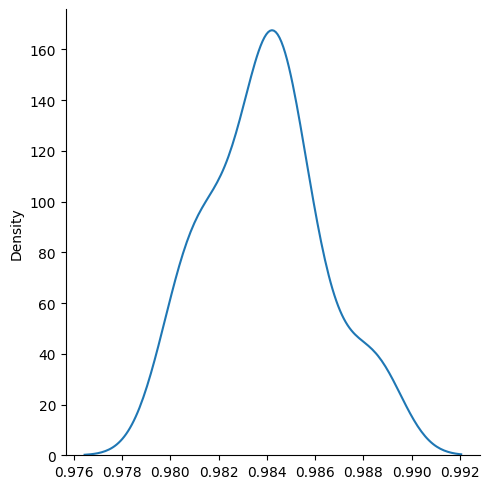

In [ ]:
sns.displot(resultados_random_forest, kind = 'kde');

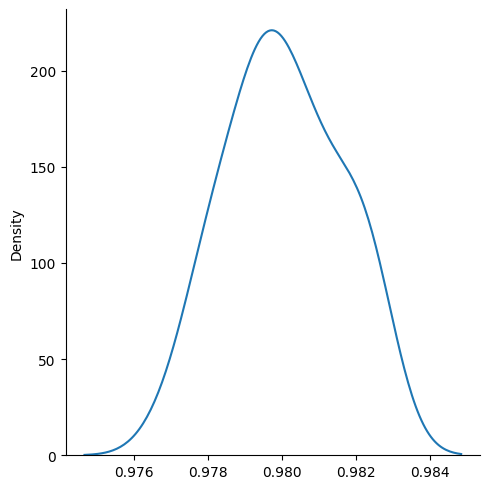

In [ ]:
sns.displot(resultados_knn, kind = 'kde');

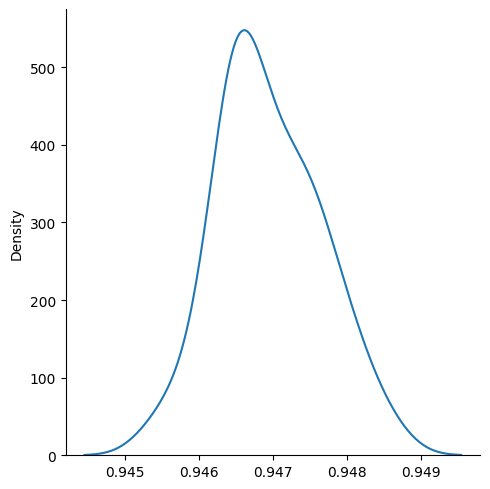

In [ ]:
sns.displot(resultados_logistica, kind = 'kde');

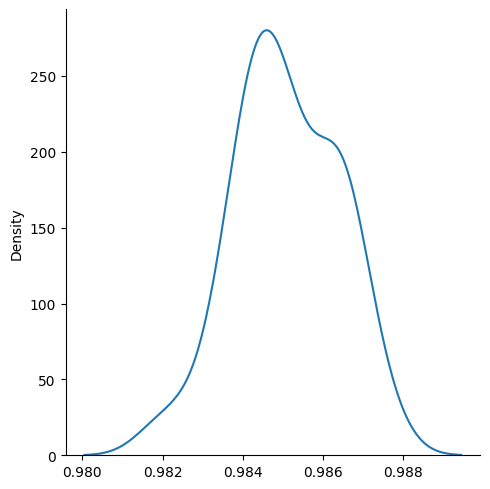

In [ ]:
sns.displot(resultados_svm, kind = 'kde');

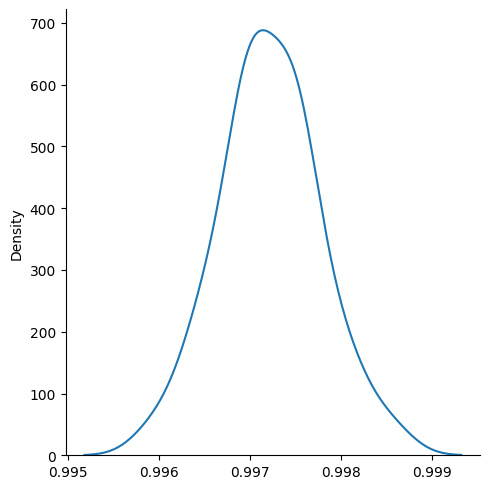

In [ ]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

O `from scipy.stats import f_oneway` importa a função `f_oneway` da biblioteca SciPy, que é utilizada para realizar o teste ANOVA de uma via (Análise de Variância). Este teste compara as médias de três ou mais grupos independentes para determinar se pelo menos um grupo difere significativamente dos outros. Ele assume que os dados seguem uma distribuição normal e têm variâncias iguais entre os grupos. A função retorna estatísticas F e p-values, onde um valor baixo de p indica que há diferenças significativas entre os grupos testados. O teste ANOVA é útil em pesquisas científicas e análises de dados para explorar diferenças entre múltiplos grupos e pode ser seguido por testes de comparação de pares para identificar quais grupos diferem entre si.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

5.0394514972605265e-176

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9965,rede_neural
176,0.9970,rede_neural
177,0.9965,rede_neural
178,0.9975,rede_neural


A importação `from statsmodels.stats.multicomp import MultiComparison` permite utilizar a classe `MultiComparison` do pacote `statsmodels.stats.multicomp`. Esta classe é usada para realizar comparações múltiplas entre grupos após a realização de um teste ANOVA ou outro teste de comparação de grupos. Ela simplifica a aplicação de métodos como o teste de Tukey, que compara todas as combinações possíveis de pares de grupos para identificar diferenças significativas entre eles. Essa abordagem é útil em pesquisas e análises de dados para explorar quais grupos específicos têm médias significantemente diferentes, após estabelecer que pelo menos um grupo difere significativamente dos outros através de um teste global, como ANOVA.


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

O teste de Tukey, também conhecido como procedimento de comparação múltipla de Tukey, é um método estatístico utilizado após um teste de análise de variância (ANOVA) para determinar quais grupos têm médias significativamente diferentes entre si. Ele compara todas as combinações possíveis de pares de grupos e controla o erro global do tipo I, fornecendo intervalos de confiança ajustados para as diferenças nas médias. Isso permite identificar quais grupos específicos são distintos uns dos outros após estabelecer que pelo menos um grupo difere significativamente dos demais.

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   -0.007    0.0 -0.0082 -0.0059   True
       arvore     logistica  -0.0401    0.0 -0.0413  -0.039   True
       arvore random_forest  -0.0031    0.0 -0.0043  -0.002   True
       arvore   rede_neural   0.0101    0.0   0.009  0.0113   True
       arvore           svm   -0.002    0.0 -0.0031 -0.0009   True
          knn     logistica  -0.0331    0.0 -0.0342  -0.032   True
          knn random_forest   0.0039    0.0  0.0028   0.005   True
          knn   rede_neural   0.0172    0.0   0.016  0.0183   True
          knn           svm    0.005    0.0  0.0039  0.0062   True
    logistica random_forest    0.037    0.0  0.0359  0.0381   True
    logistica   rede_neural   0.0503    0.0  0.0491  0.0514   True
    logistica           svm   0.0381    0.0   0.037  0.0393   

In [ ]:
resultados.mean()

Arvore           0.987083
Random forest    0.983933
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997217
dtype: float64

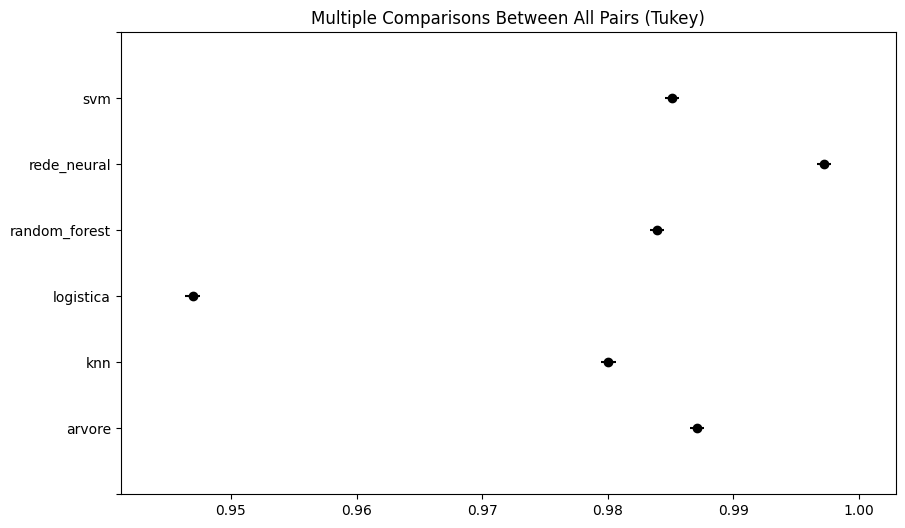

In [ ]:
teste_estatistico.plot_simultaneous();